# Regresión lineal 

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en machine learning y en estadística la regresión lineal es una aproximación para modelar la relación entre una variable escalar dependiente que denominamos Y y una o más variables explicativas denominadas X.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1920px-Linear_regression.svg.png" style="background-color:#fff" width=30%>

La idea es dibujar una recta que indica la tendencia de conjunto de datos sea la recta de color rojo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
casas=pd.read_csv('USA_Housing.csv')

In [3]:
casas.head(20)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


In [4]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
casas['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

C:\Users\borgu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


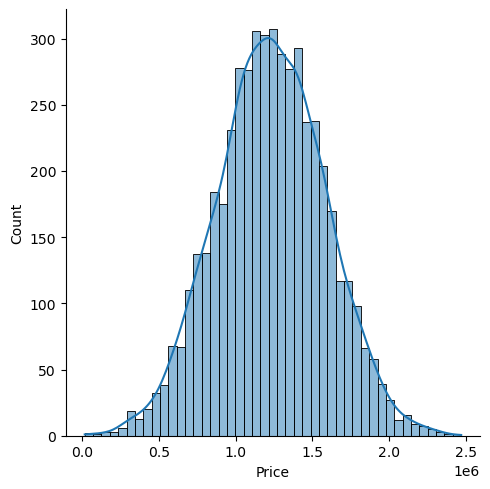

In [8]:
sns.displot(casas['Price'],kde=True)

<Axes: >

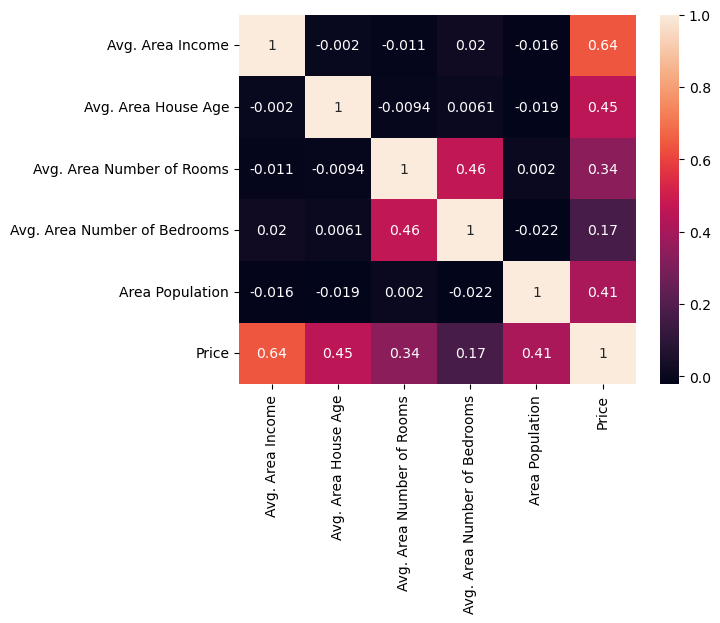

In [9]:
sns.heatmap(casas.corr(numeric_only=True),annot=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [11]:
casas.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
#hay que dividir las columnas x las características (columnas numéricas) e y la que queremos estimar (en nuestro caso 'Price'

X=casas[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
Y=casas['Price']

In [13]:
#ahora dividimos los datos en datos de entrenamiento y datos de prueba
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [14]:
#entrenamos el modelo 
lrm = LinearRegression()
lrm.fit(X_train,Y_train)

LinearRegression()

In [15]:
from sklearn import metrics

In [16]:
predicciones=lrm.predict(X_test)

In [17]:
predicciones

array([1308536.13592613, 1237122.7274647 , 1243835.62817072, ...,
       1457119.79297235, 1483428.95309343, 1047510.59737188])

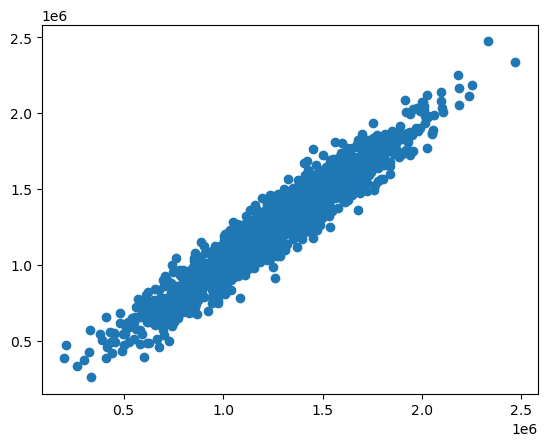

In [18]:
#comparamos las predicciones con los datos reales del test
plt.scatter(Y_test,predicciones)

C:\Users\borgu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


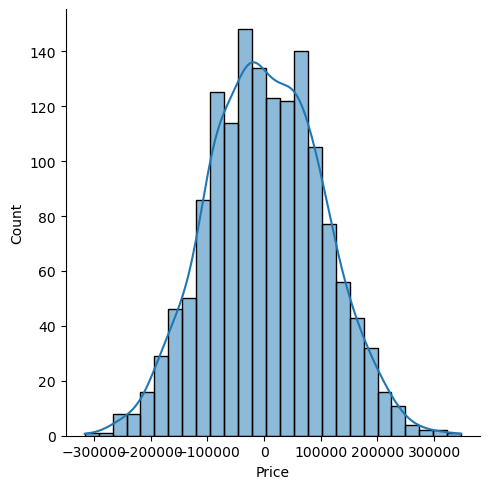

In [19]:
sns.displot(Y_test-predicciones,kde=True)
#si no fuera una distribución normal deberíamos replantarnos el modelo

MAE (Mean absolute error) - Media del valor absoluto de valores

Cuanto menor sea este valor mejor será el modelo

In [20]:
metrics.mean_absolute_error(Y_test, predicciones)

81135.5660933688

MSE (media de los errores al cuadrado)

In [21]:
metrics.mean_squared_error(Y_test,predicciones)

10068422551.401012

RMSE

In [22]:
np.sqrt(metrics.mean_squared_error(Y_test,predicciones))

100341.52954485502

# Regresión logística

Vamos a ver ahora una pequeña introducción a lo que es la regresión logística la regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica es decir una variable que puede adoptar un número limitado de categorías en función de otras variables independientes.

Es útil para modelar la probabilidad de que un evento pueda ocurrir en función de otros factores.

Es además un método de clasificación por ejemplo para clasificar los correos electrónicos según sean spam o no 

Para clasificar a las personas que solicitan un préstamo según lo puedan pagar o no o para clasificar a las personas según tengan o no una enfermedad concreta.

Estos últimos ejemplos son ejemplo de clasificaciones binarias en las que el resultado sólo puede tomar dos categorías si o no o categoría 1 o categoría 2.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png" style="background-color:#fff;width:30%">

Aquí vemos una gráfica de una regresión logística donde cualquier valor en el eje de las X que se devolverá un valor entre 0 y 1 el eje de la Y

Por lo tanto si el resultado de la función logística es mayor o igual que 0.5 consideraremos que la salida será 1 y si el resultado es menor que 0.5 la salida será 0

In [23]:
titanic_test=pd.read_csv('titanic-test.csv')
titanic_train=pd.read_csv('titanic-train.csv')
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

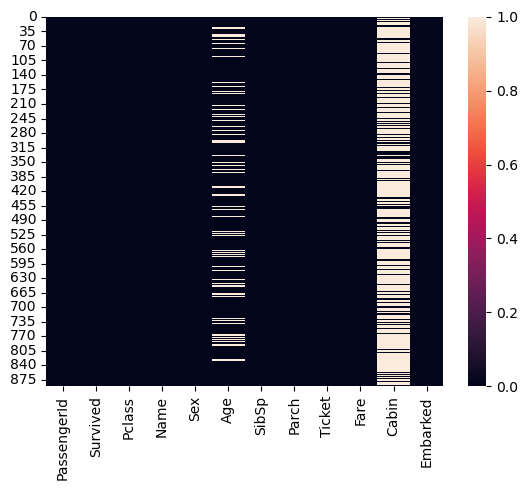

In [24]:
sns.heatmap(titanic_train.isnull())

<Axes: xlabel='Survived', ylabel='count'>

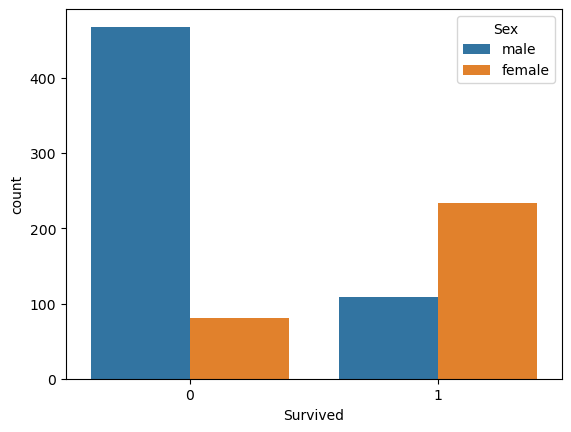

In [25]:
sns.countplot(titanic_train,x='Survived', hue='Sex')

In [26]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

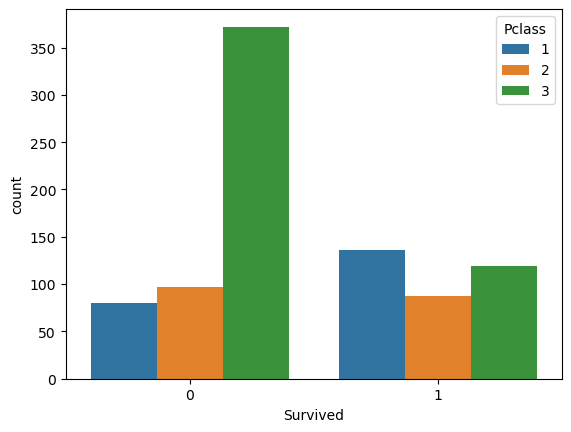

In [27]:
sns.countplot(titanic_train,x='Survived', hue='Pclass')

C:\Users\borgu\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


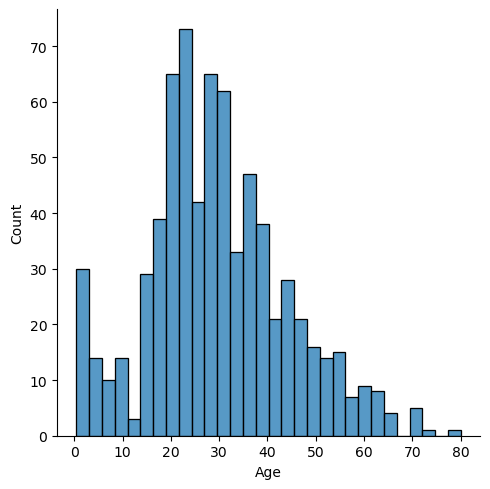

In [28]:
sns.displot(titanic_train['Age'].dropna(), bins=30)

<Axes: ylabel='Frequency'>

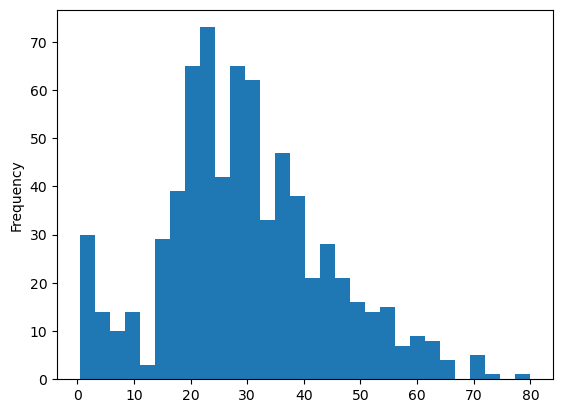

In [29]:
titanic_train['Age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

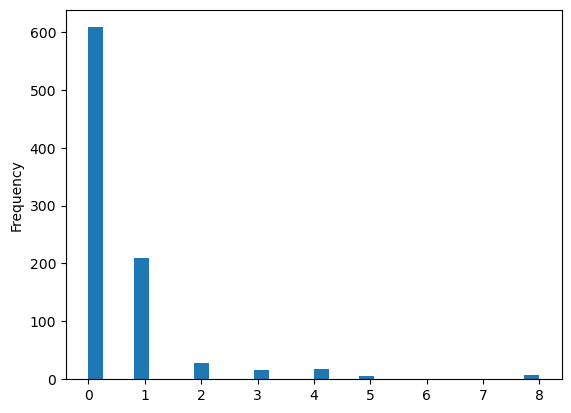

In [30]:
titanic_train['SibSp'].plot.hist(bins=30)

In [31]:
import cufflinks as cf

In [32]:
cf.go_offline()

In [33]:
titanic_train['Fare'].iplot(kind='hist',bins=40)

<Axes: >

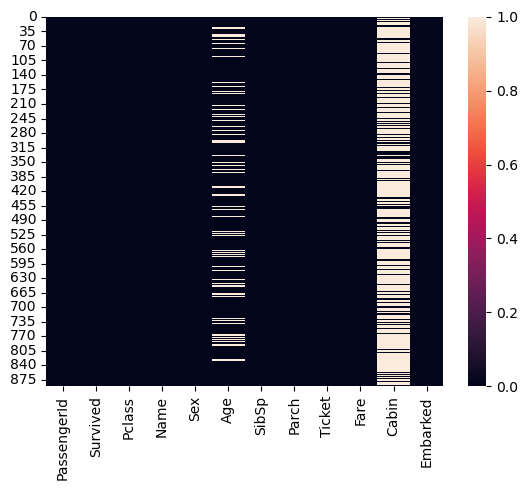

In [34]:
#limpieza de datos
sns.heatmap(titanic_train.isnull())

<Axes: xlabel='Pclass', ylabel='Age'>

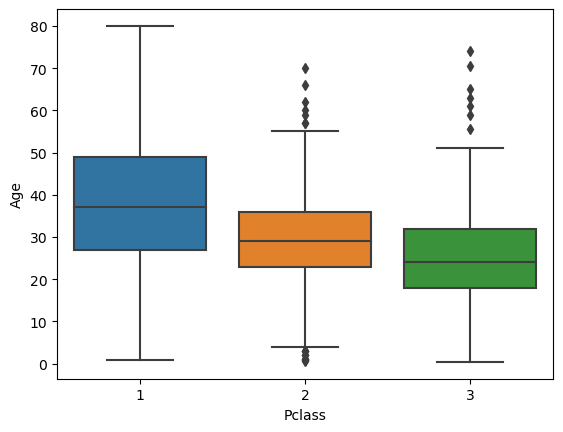

In [35]:
#La edad depende de la Clase, vamos a sustituir los valores nulos de la media por los valores medios de la edad por Clases
sns.boxplot(titanic_train,x='Pclass',y='Age')

In [36]:
titanic_train['Pclass']=titanic_train['Pclass'].astype('object')

In [37]:
def edad_media(columnas):
    mean_class=round(titanic_train.groupby(['Pclass']).mean(numeric_only=True),0)
    mean_class=mean_class['Age']
    mean_class
    edad=columnas[0]
    clase=columnas[1]
    if pd.isnull(edad):
        if clase==1:
            return mean_class[1]
        elif clase==2:
            return mean_class[2]
        else:
            return mean_class[3]
    else:
        return edad

In [ ]:
titanic_train['Age']=titanic_train[['Age','Pclass']].apply(edad_media,axis=1)

<Axes: >

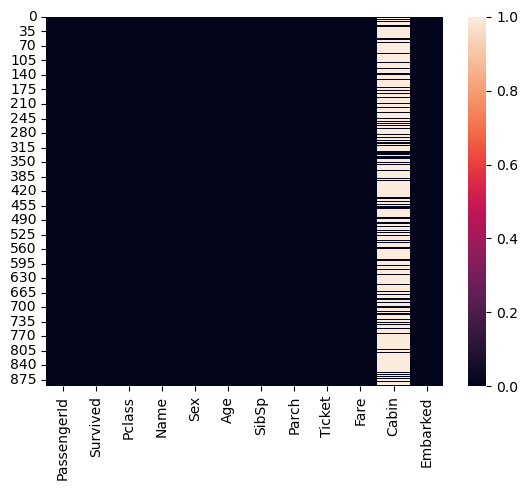

In [39]:
#comprobamos
sns.heatmap(titanic_train.isnull())

In [40]:
#La columna Cabin su mayoria son valores en blanco, por lo que no tiene sentido intentar rellenarlos. La Borranos
titanic_train.drop('Cabin',axis=1,inplace=True)

In [41]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [42]:
#Name,passengerId y ticket son columnas que no vamos a utilizar 
titanic_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)


In [43]:
#La columna 'Sex' la convertimos a alfanumerico
sexo=pd.get_dummies(titanic_train['Sex'],dtype=int,drop_first=True)


In [44]:
#Borramos 'Sex' y añadimos la nueva
titanic_train =pd.concat([titanic_train,sexo],axis=1)
titanic_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,25.0,1,2,23.4500,S,0
889,1,1,male,26.0,0,0,30.0000,C,1


In [45]:
titanic_train.drop('Sex',axis=1,inplace=True)
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1
887,1,1,19.0,0,0,30.0000,S,0
888,0,3,25.0,1,2,23.4500,S,0
889,1,1,26.0,0,0,30.0000,C,1


In [46]:
#Lo mismo con embarked
puerto=pd.get_dummies(titanic_train['Embarked'],dtype=int,drop_first=True)

In [47]:
puerto

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [48]:
titanic_train =pd.concat([titanic_train,puerto],axis=1)
titanic_train.drop('Embarked',axis=1,inplace=True)
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,25.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [49]:
#vamos a predecir si una persona sobrevive o no dependiendo de las otras caracteristicas
y=titanic_train['Survived']
X=titanic_train.drop('Survived',axis=1)
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
#Creamos el modelo
modelo=LogisticRegression()

In [54]:
#Entrenamos el modelo
modelo.fit(X_train,y_train)

C:\Users\borgu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [55]:
predicciones=modelo.predict(X_test)
predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

# Matriz de confusión

Una matriz de confusión sirve para evaluar nuestro modelo de regresión logística.

<img src="https://kaizen.com/wp-content/uploads/2024/07/image-49.png" style="background-color:#fff;width:500px"><img src="https://live.staticflickr.com/65535/48051372813_0e6a4a0806_b.jpg">


1. Categorías de resultados:
- Positivos correctos (PC)(A): Predicción spam = Realidad spam.
- Negativos correctos (NC)(D): Predicción no spam = Realidad no spam.
- Falsos positivos (FP)(C): Predicción spam ≠ Realidad no spam (error tipo 1).
- Falsos negativos (FN)(B): Predicción no spam ≠ Realidad spam (error tipo 2).

2. Cálculo de precisión:
- Fórmula: (PC + NC) / Total
- Ejemplo: (40 + 45) / 100 = 0.85 → Precisión: 85%

3. Cálculo de tasa de error:
- Fórmula: (FP + FN) / Total
- Ejemplo: (5 + 10) / 100 = 0.15 → Tasa de error: 15%

In [56]:
#evaluamos la precisión mediante las métricas
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       178
           1       0.73      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268



In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predicciones)

array([[153,  25],
       [ 21,  69]], dtype=int64)